In [2]:
# read the data into a DataFrame named nfl16
import pandas as pd
path = '../GA_Class_Project/'
url = path + 'season2016_wy.csv'
nfl16 = pd.read_csv(url, index_col = 0)
nfl16.head()

,id,home,team,pos,defense_ast,defense_ffum,defense_int,defense_sk,defense_tkl,fumbles_lost,...,receiving_twopta,receiving_twoptm,receiving_yds,rushing_att,rushing_lng,rushing_lngtd,rushing_tds,rushing_twopta,rushing_twoptm,rushing_yds
name,,,,,,,,,,,,,,,,,,,,,
T.Siemian,00-0032156,no,DEN,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,28.0,42.0,0.0,0.0,1.0,0.0,57.0
A.Janovich,00-0032956,no,DEN,FB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,44.0,4.0,33.0,28.0,1.0,0.0,0.0,33.0
D.Booker,00-0032972,no,DEN,RB,NaN,NaN,NaN,NaN,NaN,3.0,...,0.0,0.0,265.0,174.0,152.0,21.0,4.0,0.0,0.0,612.0
C.Anderson,00-0029854,no,DEN,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,128.0,110.0,106.0,13.0,4.0,0.0,0.0,437.0
V.Green,00-0028142,no,DEN,TE,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Determine total number of players in dataframe
nfl16.shape
# 1573 players in this list with 59 attributes

(1573, 59)

In [4]:
# Determine how many players would be eligible to be drafted based on open positions in a fantasy roster
nfl16.pos.value_counts()

WR     205
RB     146
DE     144
CB     129
TE     115
OLB     93
DT      90
DB      79
QB      71
LB      66
SS      52
ILB     44
FS      43
K       35
P       35
NT      25
OT      19
FB      18
MLB     16
C       16
OG      12
T        7
G        7
LS       6
SAF      3
Name: pos, dtype: int64

Since I was only interested in QB, RB, WR, TE, K, I created new DataFrames using only these positions. This step was not totally necessary but it did simplify my data nicely.

In [5]:
# Create new DataFrames using only QB, WR, RB, TE, K
nfl16_QB = nfl16.loc[nfl16.pos == 'QB']
nfl16_WR = nfl16.loc[nfl16.pos == 'WR']
nfl16_RB = nfl16.loc[nfl16.pos == 'RB']
nfl16_TE = nfl16.loc[nfl16.pos == 'TE']
nfl16_K = nfl16.loc[nfl16.pos == 'K']

In [6]:
# Concat the new DataFrames back together as "nfl16_off"
frames = [nfl16_QB, nfl16_WR, nfl16_RB, nfl16_TE, nfl16_K]
nfl16_off = pd.concat(frames)
nfl16_off.shape

(572, 59)

In [7]:
# Perform a Sanity Check to make sure the expected players are still there
nfl16_off.head()

,id,home,team,pos,defense_ast,defense_ffum,defense_int,defense_sk,defense_tkl,fumbles_lost,...,receiving_twopta,receiving_twoptm,receiving_yds,rushing_att,rushing_lng,rushing_lngtd,rushing_tds,rushing_twopta,rushing_twoptm,rushing_yds
name,,,,,,,,,,,,,,,,,,,,,
T.Siemian,00-0032156,no,DEN,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,28.0,42.0,0.0,0.0,1.0,0.0,57.0
C.Newton,00-0027939,no,CAR,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,90.0,162.0,14.0,5.0,1.0,1.0,359.0
M.Ryan,00-0026143,no,ATL,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,35.0,94.0,0.0,0.0,1.0,0.0,117.0
J.Winston,00-0031503,no,TB,QB,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,52.0,121.0,7.0,1.0,1.0,0.0,168.0
J.Flacco,00-0026158,no,BAL,QB,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,22.0,55.0,8.0,2.0,0.0,0.0,53.0


In [8]:
# Determine column headers
nfl16_off.columns.values.tolist()

['id',
 'home',
 'team',
 'pos',
 'defense_ast',
 'defense_ffum',
 'defense_int',
 'defense_sk',
 'defense_tkl',
 'fumbles_lost',
 'fumbles_rcv',
 'fumbles_tot',
 'fumbles_trcv',
 'fumbles_yds',
 'kicking_fga',
 'kicking_fgm',
 'kicking_fgyds',
 'kicking_totpfg',
 'kicking_xpa',
 'kicking_xpb',
 'kicking_xpmade',
 'kicking_xpmissed',
 'kicking_xptot',
 'kickret_avg',
 'kickret_lng',
 'kickret_lngtd',
 'kickret_ret',
 'kickret_tds',
 'passing_att',
 'passing_cmp',
 'passing_ints',
 'passing_tds',
 'passing_twopta',
 'passing_twoptm',
 'passing_yds',
 'punting_avg',
 'punting_i20',
 'punting_lng',
 'punting_pts',
 'punting_yds',
 'puntret_avg',
 'puntret_lng',
 'puntret_lngtd',
 'puntret_ret',
 'puntret_tds',
 'receiving_lng',
 'receiving_lngtd',
 'receiving_rec',
 'receiving_tds',
 'receiving_twopta',
 'receiving_twoptm',
 'receiving_yds',
 'rushing_att',
 'rushing_lng',
 'rushing_lngtd',
 'rushing_tds',
 'rushing_twopta',
 'rushing_twoptm',
 'rushing_yds']

In [137]:
nfl16.head()

,id,home,team,pos,defense_ast,defense_ffum,defense_int,defense_sk,defense_tkl,fumbles_lost,...,receiving_twopta,receiving_twoptm,receiving_yds,rushing_att,rushing_lng,rushing_lngtd,rushing_tds,rushing_twopta,rushing_twoptm,rushing_yds
name,,,,,,,,,,,,,,,,,,,,,
T.Siemian,00-0032156,no,DEN,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,28.0,42.0,0.0,0.0,1.0,0.0,57.0
A.Janovich,00-0032956,no,DEN,FB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,44.0,4.0,33.0,28.0,1.0,0.0,0.0,33.0
D.Booker,00-0032972,no,DEN,RB,NaN,NaN,NaN,NaN,NaN,3.0,...,0.0,0.0,265.0,174.0,152.0,21.0,4.0,0.0,0.0,612.0
C.Anderson,00-0029854,no,DEN,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,128.0,110.0,106.0,13.0,4.0,0.0,0.0,437.0
V.Green,00-0028142,no,DEN,TE,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Backup Modeling - A player's position can be predicted from their stats.
nfl16_off.head()

,id,home,team,pos,defense_ast,defense_ffum,defense_int,defense_sk,defense_tkl,fumbles_lost,...,receiving_twopta,receiving_twoptm,receiving_yds,rushing_att,rushing_lng,rushing_lngtd,rushing_tds,rushing_twopta,rushing_twoptm,rushing_yds
name,,,,,,,,,,,,,,,,,,,,,
T.Siemian,00-0032156,no,DEN,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,28.0,42.0,0.0,0.0,1.0,0.0,57.0
C.Newton,00-0027939,no,CAR,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,90.0,162.0,14.0,5.0,1.0,1.0,359.0
M.Ryan,00-0026143,no,ATL,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,35.0,94.0,0.0,0.0,1.0,0.0,117.0
J.Winston,00-0031503,no,TB,QB,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,52.0,121.0,7.0,1.0,1.0,0.0,168.0
J.Flacco,00-0026158,no,BAL,QB,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,22.0,55.0,8.0,2.0,0.0,0.0,53.0


In [85]:
nfl16_off.pos.unique()

array(['QB', 'WR', 'RB', 'TE', 'K'], dtype=object)

In [86]:
# map positions to numbers and store in new column
nfl16_off['pos_num'] = nfl16_off.pos.map({'QB':0, 'WR':1, 'RB':2, 'TE':3, 'K':4})
nfl16_off.head()

,id,home,team,pos,defense_ast,defense_ffum,defense_int,defense_sk,defense_tkl,fumbles_lost,...,receiving_twoptm,receiving_yds,rushing_att,rushing_lng,rushing_lngtd,rushing_tds,rushing_twopta,rushing_twoptm,rushing_yds,pos_num
name,,,,,,,,,,,,,,,,,,,,,
T.Siemian,00-0032156,no,DEN,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,28.0,42.0,0.0,0.0,1.0,0.0,57.0,0
C.Newton,00-0027939,no,CAR,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,90.0,162.0,14.0,5.0,1.0,1.0,359.0,0
M.Ryan,00-0026143,no,ATL,QB,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,35.0,94.0,0.0,0.0,1.0,0.0,117.0,0
J.Winston,00-0031503,no,TB,QB,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,52.0,121.0,7.0,1.0,1.0,0.0,168.0,0
J.Flacco,00-0026158,no,BAL,QB,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,22.0,55.0,8.0,2.0,0.0,0.0,53.0,0


In [92]:
# import KNN class we need from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [106]:
# fill NaN's with 0
nfl16_zero = nfl16_off.copy()

for column in nfl16_zero:
    nfl16_zero[column].fillna(0, inplace = True)

nfl16_zero.head()

,id,home,team,pos,defense_ast,defense_ffum,defense_int,defense_sk,defense_tkl,fumbles_lost,...,receiving_twoptm,receiving_yds,rushing_att,rushing_lng,rushing_lngtd,rushing_tds,rushing_twopta,rushing_twoptm,rushing_yds,pos_num
name,,,,,,,,,,,,,,,,,,,,,
T.Siemian,00-0032156,no,DEN,QB,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,28.0,42.0,0.0,0.0,1.0,0.0,57.0,0
C.Newton,00-0027939,no,CAR,QB,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,90.0,162.0,14.0,5.0,1.0,1.0,359.0,0
M.Ryan,00-0026143,no,ATL,QB,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,35.0,94.0,0.0,0.0,1.0,0.0,117.0,0
J.Winston,00-0031503,no,TB,QB,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,52.0,121.0,7.0,1.0,1.0,0.0,168.0,0
J.Flacco,00-0026158,no,BAL,QB,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,22.0,55.0,8.0,2.0,0.0,0.0,53.0,0


In [107]:
# Create Feature Matrix and Response Vector
# Only considering features that can be mapped to fantasy points
feature_cols_pos = ['fumbles_lost', 'passing_yds', 'passing_tds', 'passing_ints', 'rushing_yds', 'rushing_tds', 'receiving_yds',
                   'receiving_tds', 'passing_twoptm', 'receiving_twoptm','rushing_twoptm','kicking_xpmade','kicking_fgm']
X_pos = nfl16_zero[feature_cols_pos]
print X_pos.shape

y_pos = nfl16_zero['pos_num']
print y_pos.shape

X_pos_tr, X_pos_te, y_pos_tr, y_pos_te = train_test_split(X_pos, y_pos, random_state=1)

(572, 13)
(572L,)


In [108]:
# Training the model using k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_pos_tr, y_pos_tr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [110]:
# STEP 3: test the model on the testing set, and check the accuracy
from sklearn import metrics
y_pos_pred = knn.predict(X_pos_te)
print metrics.accuracy_score(y_pos_te, y_pos_pred) #0.6923

0.692307692308


In [113]:
# compute null accuracy
y_pos_te.value_counts()/len(y_pos_te)
# well nothing shows up more than about 1/3 of the time so we're more accurate than null

1    0.272727
2    0.265734
3    0.230769
0    0.160839
4    0.069930
Name: pos_num, dtype: float64

In [115]:
# Calculating best k and also testing/training error rates
k_range = range(1, 101)
training_error_rate = []
testing_error_rate = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X_pos, y_pos)
    y_pos_pred_train = knn.predict(X_pos)
    training_accuracy = metrics.accuracy_score(y_pos, y_pos_pred_train)
    training_error_rate.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_pos_tr, y_pos_tr)
    y_pos_pred_test = knn.predict(X_pos_te)
    testing_accuracy = metrics.accuracy_score(y_pos_te, y_pos_pred_test)
    testing_error_rate.append(1 - testing_accuracy)

In [119]:
column_dict = {'K': k_range, 'training error rate':training_error_rate, 'testing error rate':testing_error_rate}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=True)
df.sort_values(by='testing error rate').head()
# Looks like k = 5 is best

,testing error rate,training error rate
K,,
5,0.265734,0.195804
6,0.265734,0.195804
4,0.272727,0.187063
7,0.279720,0.211538
3,0.293706,0.173077


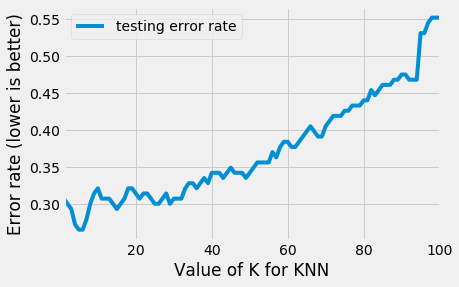

In [132]:
plt.style.use('fivethirtyeight');
df.plot(y='testing error rate')
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate (lower is better)')

In [121]:
# Retrain model using k = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_pos_tr, y_pos_tr)
y_pos_pred5 = knn.predict(X_pos_te)
print metrics.accuracy_score(y_pos_te, y_pos_pred5)
# just me or does this seem less accurate?

0.447552447552


In [122]:
# Trying to predict position of with fake values
# create a list to represent a player

import random
player = random.sample(range(1, 100), 13)
player

[32, 58, 17, 45, 59, 7, 2, 23, 31, 4, 16, 22, 21]

In [125]:
# Using the model
print knn5.predict([player])
print knn5.predict_proba([player])
# Random player is most likely 2/RB with those stats
# nfl16_off.pos.map({'QB':0, 'WR':1, 'RB':2, 'TE':3, 'K':4})

[2]
[[ 0.2  0.2  0.6  0.   0. ]]


Player position can be predicted based off of random stats. While this is nice, it's not very helpful since player position is not a hidden value.